In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from skimage import color
from PIL import Image
import os

%matplotlib inline

In [2]:
def greyscale(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

def invert_img(img):
    return 255-img

def blur_img(img):
    return scipy.ndimage.filters.gaussian_filter(img,sigma=5)

def dodge(front,back):
    result=front*255/(255-back) 
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')

def to_sketch(img):
    gray_img = greyscale(img)
    inverted_img = invert_img(gray_img)
    blurred_img = blur_img(inverted_img)
    
    return dodge(blurred_img, gray_img)

In [3]:
img = cv2.imread('1.jpg')

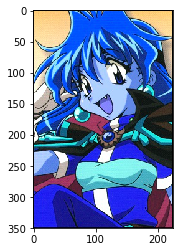

In [4]:
plt.imshow(img)

In [4]:
img2 = np.zeros_like(img)

In [5]:
x, y, z = img2.shape
print(x,y,z)

350 225 3


In [6]:
imgc = img.reshape(x*y*z)

In [5]:
def get_hint(img):
    x, y, z = img.shape
    imgc = img.reshape(x*y*z)
    img2 = np.zeros_like(imgc)
    
    count = 0
    copy = False
    copy_probability = 0.0001
    copy_length = 20
    min_copy_length, max_copy_length = 10, 60

    for i in range(imgc.shape[0]):

        if not copy:
            rand_n = random.random()
            if rand_n < copy_probability:
                copy = True
                count = 0
                copy_length = random.randint(min_copy_length, max_copy_length)

        if copy and count >= copy_length:
            copy = False

        if copy:
            img2[i] = imgc[i]
            count += 1
        else:
            img2[i] = 255


    img2c = img2.reshape((x,y,z))
    
    return img2c

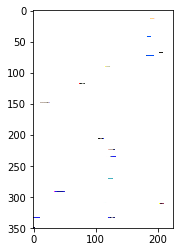

In [7]:
plt.imshow(get_hint(img))

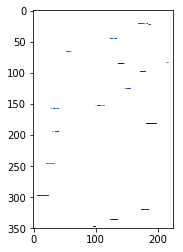

In [17]:
img2 = np.zeros_like(imgc)
count = 0
copy = False
copy_probability = 0.0001
copy_length = 20
min_copy_length, max_copy_length = 10, 60

for i in range(imgc.shape[0]):
    
    if not copy:
        rand_n = random.random()
        if rand_n < copy_probability:
            copy = True
            count = 0
            copy_length = random.randint(min_copy_length, max_copy_length)
    
    if copy and count >= copy_length:
        copy = False
        
    if copy:
        img2[i] = imgc[i]
        count += 1
    else:
        img2[i] = 255
        
    
img2c = img2.reshape((x,y,z))

cv2.imwrite('hint.jpg', img2c)
plt.imshow(img2c)

In [21]:
img_s = to_sketch(img)

/home/ht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [24]:
cv2.imwrite('sk.jpg', img_s)

True

In [27]:
added = cv2.addWeighted(img_s, 0.5, img2c, 0.5, 0)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/core/src/arithm.cpp:656: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [28]:
img_s.shape

(350, 225)

In [30]:
img2c.shape

(350, 225, 3)